#### Entity Creation
This Notebook demonstrates the basic creation of entities using a simple set of SQL tables and columns.

#### Configuration

In [41]:

import yaml, requests, json

# Open the config file to read the client details
with open("../config/config.yaml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)

client_id = config[0]['client_id']
client_secret = config[0]['client_secret']
tenant_id = config[0]['tenant_id']
purview_account_name = config[0]['purview_account_name']
scope = f"{config[0]['resource']}/.default"
purview_endpoint = f"https://{purview_account_name}.purview.azure.com"
authority = f"https://login.microsoftonline.com/{tenant_id}"

access_token = ""

#### Functions

In [4]:
# Function to construct header for HTTP requests
# Parameters:  None
# Returns: Dictionary with header information
##
def getHeaders():
    headers = {
        'Authorization': f'Bearer {access_token}',
        'Content-Type': 'application/json'
    }
    return headers;

#### 1. OAuth Login
Perform Authentication using the Microsoft Authentication Library and get a bearer token for subsequent API calls

In [42]:
from msal import ConfidentialClientApplication

app = ConfidentialClientApplication(client_id, authority=authority, client_credential=client_secret)
result = app.acquire_token_for_client(scopes=scope)

access_token = result['access_token']

#### 2. Create Server, Database and Schema objects
In this example, we'll create a simple set of entities to represent an Azure SQL Database, Schema, Tables, and columns.  Purview has a number of pre-defined Atlas Types to present these entities:

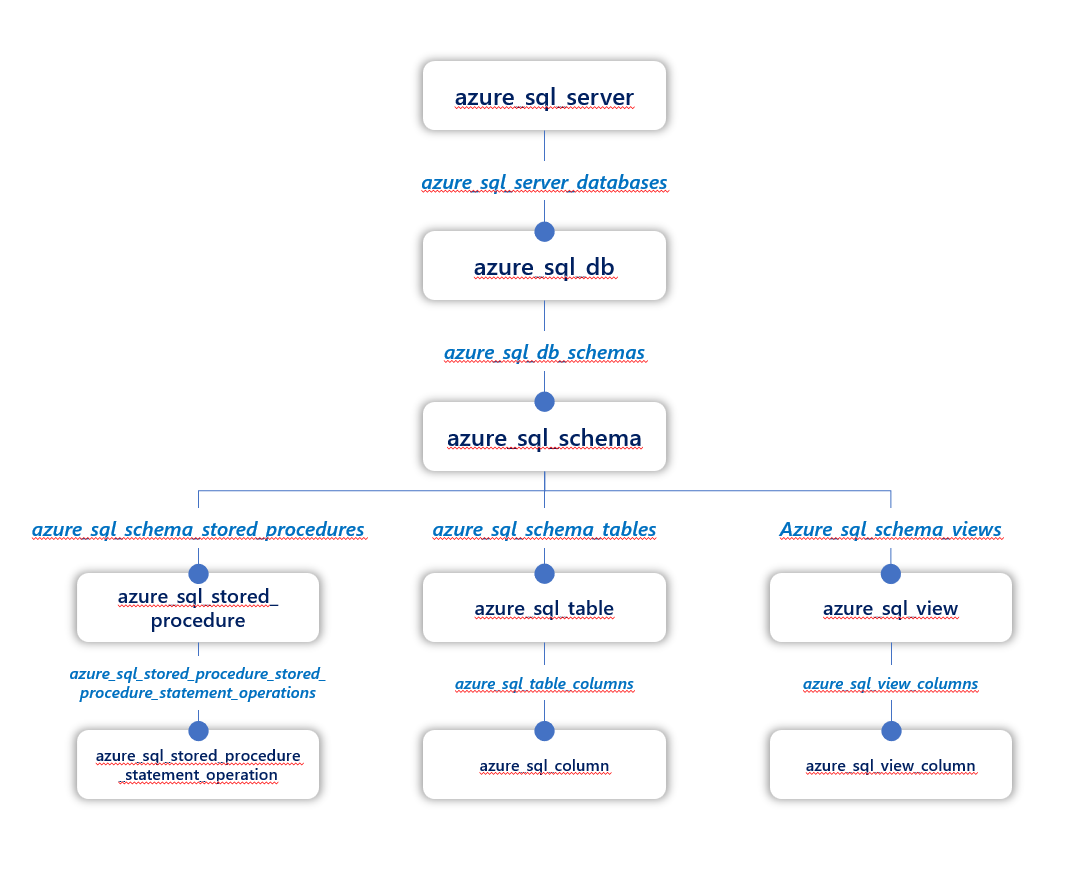

In [17]:
# Create some definitions for the database objects
server_name = "customerDbSrvr"
server_fqdn = f"mssql://{server_name}.database.windows.net"
db_name = "customerDb"
schema_name = "dbo"
t1 = "customer"
t1c1 = "customerId"
t1c2 = "customerName"
t1c3 = "customerTelephone"
t1c4 = "customerEmail"
t1c5 = "customerStatus"
t2 = "address"
t2c1 = "addressId"
t2c2 = "customerId"
t2c3 = "addressType"
t2c4 = "addressLine1"
t2c5 = "addressLine2"
t2c6 = "townCity"
t2c7 = "region"
t2c8 = "postCode" 

# Use the bulk create API to upload a batch of entities
url_bulk = f"{purview_endpoint}/catalog/api/atlas/v2/entity/bulk?api-version=2022-08-01-preview"

payload = json.dumps({
  "referredEntities": {},
  "entities": [
    {
      "typeName": "azure_sql_server",
      "guid": "-1",
      "attributes": {
        "name": server_name, 
        "qualifiedName": server_fqdn
      }
    },
    {
      "typeName": "azure_sql_db",
      "guid": "-10",
      "attributes": {
        "name":  db_name, 
        "qualifiedName": server_fqdn + "/" + db_name
      },
      "relationshipAttributes": {
        "server": {
          "guid": "-1"
        }
      }
    },
    {
       "typeName": "azure_sql_schema",
       "guid": "-100",
       "attributes": {
         "name": schema_name, 
         "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name
       },
       "relationshipAttributes": {
        "db": {
          "guid": "-10"
        }
      }
    },
    {
       "typeName": "azure_sql_table",
       "guid": "-1000",
       "attributes": {
         "name": t1, 
         "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1
       },
       "relationshipAttributes": {
        "dbSchema": {
          "guid": "-100"
        }
      }
    },
    {
       "typeName": "azure_sql_column",
       "guid": "-10001",
       "attributes": {
        "name": t1c1, 
        "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1 + "/" + t1c1,
        "data_type": "nvarchar"
      },
      "relationshipAttributes": {
        "table": {
          "guid": "-1000"
        }
      }
    },
    {
       "typeName": "azure_sql_column",
       "guid": "-10002",
       "attributes": {
        "name": t1c2, 
        "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1 + "/" + t1c2,
        "data_type": "nvarchar"
      },
      "relationshipAttributes": {
        "table": {
          "guid": "-1000"
        }
      }
    },
    {
       "typeName": "azure_sql_column",
       "guid": "-10003",
       "attributes": {
        "name": t1c3, 
        "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1 + "/" + t1c3,
        "data_type": "nvarchar"
      },
      "relationshipAttributes": {
        "table": {
          "guid": "-1000"
        }
      }
    },
    {
       "typeName": "azure_sql_column",
       "guid": "-10004",
       "attributes": {
        "name": t1c4, 
        "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1 + "/" + t1c4,
        "data_type": "nvarchar"
      },
      "relationshipAttributes": {
        "table": {
          "guid": "-1000"
        }
      }
    },
    {
       "typeName": "azure_sql_column",
       "guid": "-10005",
       "attributes": {
        "name": t1c5, 
        "qualifiedName": server_fqdn + "/" + db_name + "/" + schema_name + "/" + t1 + "/" + t1c5,
        "data_type": "nvarchar"
      },
      "relationshipAttributes": {
        "table": {
          "guid": "-1000"
        }
      }
    }
  ]
})    

response = json.loads(requests.request("POST", url_bulk, headers=getHeaders(), data=payload).content)

print(response)

# Get the generated guids list from the returned dictionary (use these to reference the 'real' guids later)
guid_assignments = response['guidAssignments']



{'mutatedEntities': {'CREATE': [{'typeName': 'azure_sql_column', 'attributes': {'qualifiedName': 'mssql://customerDbSrvr.database.windows.net/customerDb/dbo/customer/customerStatus', 'name': 'customerStatus'}, 'guid': 'd7880fdb-7035-45cd-a55f-aaf6f6f60005', 'displayText': 'customerStatus', 'classificationNames': [], 'classifications': [], 'meaningNames': [], 'meanings': [], 'isIncomplete': False, 'labels': [], 'isIndexed': True}]}, 'guidAssignments': {'-100': 'd89d09ca-ded0-419e-8257-12c4ea5dee70', '-10003': 'd7880fdb-7035-45cd-a55f-aaf6f6f60001', '-1': '3c8dab27-2e87-4555-93b1-0da641955323', '-10002': 'd7880fdb-7035-45cd-a55f-aaf6f6f60002', '-10001': 'd7880fdb-7035-45cd-a55f-aaf6f6f60003', '-10005': 'd7880fdb-7035-45cd-a55f-aaf6f6f60005', '-10004': 'd7880fdb-7035-45cd-a55f-aaf6f6f60004', '-10': '2f63c5d9-32fd-463f-a483-ad4a87c6b451', '-1000': 'd7880fdb-7035-45cd-a55f-aaf6f6f60000'}}


#### 3. Cleanup
Delete the resources we just created using the guid assignment dict and gthe bulk delete operation

In [43]:
delete_guids_uri = f"{purview_endpoint}/catalog/api/atlas/v2/entity/bulk?"

# Append the guid values to the URI
for guid_key in guid_assignments:
    delete_guids_uri += f"guid={guid_assignments[guid_key]}&"

#Delete all the objects we created using the guid_assignments list
requests.request("DELETE", delete_guids_uri[:-1], headers=getHeaders())


https://pvdemoarfj5-pv.purview.azure.com/catalog/api/atlas/v2/entity/bulk?guid=d89d09ca-ded0-419e-8257-12c4ea5dee70&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60001&guid=3c8dab27-2e87-4555-93b1-0da641955323&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60002&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60003&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60005&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60004&guid=2f63c5d9-32fd-463f-a483-ad4a87c6b451&guid=d7880fdb-7035-45cd-a55f-aaf6f6f60000&
<Response [200]>
